<a href="https://colab.research.google.com/github/SumitMohan/Covid-19-Lockdown-impact-on-Students/blob/main/4th_Sentiment_Analysis_Covid_19_Lockdown_Impact_TextBlob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#we can install TextBlob 
!pip install textblob

In [2]:
#for cleaning the responses
!pip install Texthero

In [3]:
#importing TextBlob
import textblob
from textblob import TextBlob

In [4]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
#Texthero for data cleaning
import texthero as hero
import warnings
warnings.filterwarnings('ignore')

In [5]:
#Loading the T Dataset
data= pd.read_csv('Responses.csv')

In [6]:
data.head()

,Resp ID,Region of residence,Age,You are?(Education),Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Responses
0,1,Kanpur,14,High-School,3.0,Good,Smartphone or Laptop/Desktop,2.0,0.0,6.0,1.0,Whatsapp,1,1,Increased,NO,Listening to music,YES,YES,School/college,Who will responsible for students carrier beca...
1,2,Kolkata,23,Bachelor Degree,5.0,Average,Smartphone,5.0,1.0,8.0,1.0,Whatsapp,2,3,Remain Constant,NO,gardening cartoon,YES,YES,Roaming around freely,Taking ongoing online classes is quite tedious...
2,3,Hyderabad,13,Secondary,3.0,Excellent,Smartphone,2.0,0.0,8.0,1.0,Youtube,0,3,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives",Financial problem no network coverage
3,4,Roorkee,13,Secondary,4.0,Good,Smartphone,4.0,1.0,8.0,1.0,Whatsapp,2,3,Decreased,NO,Reading,YES,YES,School/college,In this pandemic no hope from anyone nobody ca...
4,5,Kanpur,19,Intermediate,4.0,Very poor,Laptop/Desktop,3.0,1.0,8.0,3.0,Whatsapp,2,3,Increased,NO,Meditation,YES,YES,School/college,however my college is not helping/ demanding f...


In [7]:
#we need only Tweet Text
df= data[['Responses']]
df.head(5)

,Responses
0,Who will responsible for students carrier beca...
1,Taking ongoing online classes is quite tedious...
2,Financial problem no network coverage
3,In this pandemic no hope from anyone nobody ca...
4,however my college is not helping/ demanding f...


In [8]:
df['CleanData']=hero.clean(df['Responses'])

df.head(10)

,Responses,CleanData
0,Who will responsible for students carrier beca...,responsible students carrier two lockdown stud...
1,Taking ongoing online classes is quite tedious...,taking ongoing online classes quite tedious an...
2,Financial problem no network coverage,financial problem network coverage
3,In this pandemic no hope from anyone nobody ca...,pandemic hope anyone nobody help situation eve...
4,however my college is not helping/ demanding f...,however college helping demanding extra due fe...
5,vaccine is avaiable now so why can not take ac...,vaccine avaiable take action save carrer
6,sometimes I feel this is the life that I am no...,sometimes feel life enjoying
7,Relatives are not able to Help.,relatives able help
8,Btech is all abot practical things…theory is n...,btech abot practical things...theory sufficient
9,I don't have laptop to study unable to attend ...,laptop study unable attend classes environment...


In [9]:
text1 =  "Vaccine is very effective"
blob1 = TextBlob(text1)
blob1.sentiment

Sentiment(polarity=0.78, subjectivity=1.0)

In [10]:
text2 =  "Vaccine is very bad lots of side effects"
blob2 = TextBlob(text2)
blob2.sentiment

Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)

In [11]:
text3 =  "is Covaxin has approval  WHO"
blob3 = TextBlob(text3)
blob3.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [12]:
polarity_score = [] #Creating Empty List

In [13]:
for i in range(0,df.shape[0] ): #first record to lst record
    score = TextBlob(df.iloc[i][1]) #selecting second column TextBlob Data
    score1 = score.sentiment[0] #getting the sentiment score
    polarity_score.append(score1) #adding each tweets polarity score into list

In [14]:
df = pd.concat([df, pd.Series(polarity_score)]  , axis =1 )
#dding polarity score into original dataframe
df.head(5)

,Responses,CleanData,0
0,Who will responsible for students carrier beca...,responsible students carrier two lockdown stud...,0.100000
1,Taking ongoing online classes is quite tedious...,taking ongoing online classes quite tedious an...,-0.166667
2,Financial problem no network coverage,financial problem network coverage,0.000000
3,In this pandemic no hope from anyone nobody ca...,pandemic hope anyone nobody help situation eve...,0.000000
4,however my college is not helping/ demanding f...,however college helping demanding extra due fe...,-0.281250


In [15]:
#Renaming added column
df.rename(columns={df.columns[2]  :"Sentiment"}, inplace = True ) 

In [16]:
#getting number of Positive Sentiments
len(df[df.Sentiment > 0])

239

In [17]:
#getting number of Negative Sentiments
len(df[df.Sentiment <0])

299

In [18]:
#Total No. of Tweets
df.shape

(1182, 3)

In [19]:
#getting the Neutral Sentiments
len(df[df.Sentiment ==0])

644

In [20]:
#creating wordcloud 
from wordcloud import WordCloud  
WordCloud
from  nltk.corpus import stopwords #for stopwords 

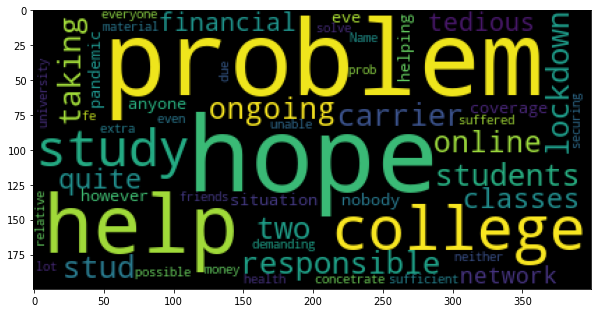

In [21]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(df['CleanData']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

In [22]:
positive_tweet=  df[df.Sentiment >0]
positive_tweet.shape

(239, 3)

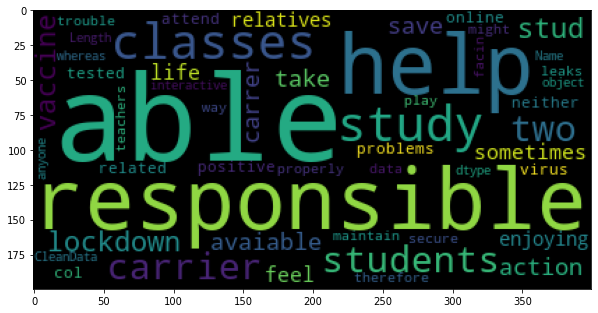

In [23]:
cloud  = WordCloud(max_words= 80, stopwords=stopwords.words("english") ).generate(str(positive_tweet['CleanData']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

In [24]:
negative_tweet=  df[df.Sentiment <0]
negative_tweet.shape

(299, 3)

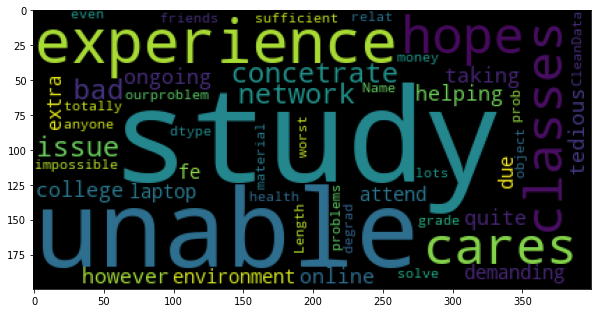

In [25]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(negative_tweet['CleanData']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

In [26]:
neutral_tweet=  df[df.Sentiment ==0]
neutral_tweet.shape

(644, 3)

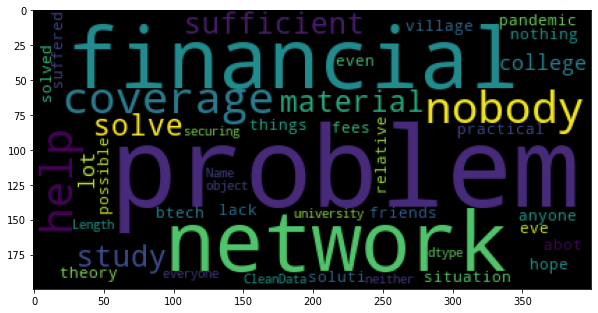

In [27]:
cloud  = WordCloud(max_words= 50, stopwords=stopwords.words("english") ).generate(str(neutral_tweet['CleanData']) )
plt.figure(figsize= (10 , 10)) 
plt.imshow(cloud)

Sentiment analysis by stanza


In [28]:
!pip install stanza
!pip install pycorenlp
# Stanza
import stanza
stanza.download('en')



2021-08-31 13:20:11 INFO: Downloading default packages for language: en (English)...
2021-08-31 13:20:12 INFO: File exists: /root/stanza_resources/en/default.zip.
2021-08-31 13:20:18 INFO: Finished downloading models and saved to /root/stanza_resources.


In [29]:
import stanza

nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment')

2021-08-31 13:20:18 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-08-31 13:20:18 INFO: Use device: cpu
2021-08-31 13:20:18 INFO: Loading: tokenize
2021-08-31 13:20:18 INFO: Loading: sentiment
2021-08-31 13:20:18 INFO: Done loading processors!


In [30]:
# Stanford CoreNLP
from pycorenlp import StanfordCoreNLP

In [31]:
import pandas as pd
tweet=pd.read_csv('Responses.csv')
tweet.head(2)

,Resp ID,Region of residence,Age,You are?(Education),Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Responses
0,1,Kanpur,14,High-School,3.0,Good,Smartphone or Laptop/Desktop,2.0,0.0,6.0,1.0,Whatsapp,1,1,Increased,NO,Listening to music,YES,YES,School/college,Who will responsible for students carrier beca...
1,2,Kolkata,23,Bachelor Degree,5.0,Average,Smartphone,5.0,1.0,8.0,1.0,Whatsapp,2,3,Remain Constant,NO,gardening cartoon,YES,YES,Roaming around freely,Taking ongoing online classes is quite tedious...


In [32]:
tweet['Responses']

0       Who will responsible for students carrier beca...
1       Taking ongoing online classes is quite tedious...
2                  Financial problem no network coverage 
3       In this pandemic no hope from anyone nobody ca...
4       however my college is not helping/ demanding f...
                              ...                        
1177    Not possible to solve my problem even my frien...
1178                                 has suffered a lot. 
1179    Everyone is securing themselves that's it Neit...
1180    no hope/unable to concetrate on study/ no mone...
1181                 Don't have sufficient study material
Name: Responses, Length: 1182, dtype: object

In [33]:
# Obtain (average) sentiment score generated by Stanza for each Tweet
import numpy as np
def stanza_analyze(Text):
    document = nlp(Text)
    print('Processing')
    return np.mean([(i.sentiment - 1) for i in document.sentences]) 
# Minus 1 so as to bring score range of [0,2] to [-1,1]
  
# Obtain sentiment categorical score generated by Stanza
tweet['stanza_score'] = tweet['Responses'].apply(lambda x: stanza_analyze(x))
neutral_thresh = 0.05
# Convert average Stanza sentiment score into sentiment categories
tweet['stanza_sentiment'] = tweet['stanza_score'].apply(lambda c: 'Positive' if c >= neutral_thresh else ('Negative' if c <= -(neutral_thresh) else 'Neutral'))

Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing
Processing

In [34]:
tweet.head(10)

,Resp ID,Region of residence,Age,You are?(Education),Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Responses,stanza_score,stanza_sentiment
0,1,Kanpur,14,High-School,3.0,Good,Smartphone or Laptop/Desktop,2.0,0.00,6.0,1.0,Whatsapp,1,1,Increased,NO,Listening to music,YES,YES,School/college,Who will responsible for students carrier beca...,-1.0,Negative
1,2,Kolkata,23,Bachelor Degree,5.0,Average,Smartphone,5.0,1.00,8.0,1.0,Whatsapp,2,3,Remain Constant,NO,gardening cartoon,YES,YES,Roaming around freely,Taking ongoing online classes is quite tedious...,0.0,Neutral
2,3,Hyderabad,13,Secondary,3.0,Excellent,Smartphone,2.0,0.00,8.0,1.0,Youtube,0,3,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives",Financial problem no network coverage,-1.0,Negative
3,4,Roorkee,13,Secondary,4.0,Good,Smartphone,4.0,1.00,8.0,1.0,Whatsapp,2,3,Decreased,NO,Reading,YES,YES,School/college,In this pandemic no hope from anyone nobody ca...,-1.0,Negative
4,5,Kanpur,19,Intermediate,4.0,Very poor,Laptop/Desktop,3.0,1.00,8.0,3.0,Whatsapp,2,3,Increased,NO,Meditation,YES,YES,School/college,however my college is not helping/ demanding f...,-1.0,Negative
5,6,Delhi-NCR,20,Preparation,2.0,Average,Laptop/Desktop,2.0,1.00,9.0,1.0,Youtube,1,3,Remain Constant,NO,Listening to music,YES,NO,Roaming around freely,vaccine is avaiable now so why can not take ac...,-1.0,Negative
6,7,Hyderabad,18,Intermediate,2.0,Good,NaN,3.0,1.00,7.0,2.0,Whatsapp,1,3,Remain Constant,YES,Online gaming,YES,YES,Travelling,sometimes I feel this is the life that I am no...,-0.5,Negative
7,8,Mumbai,14,Secondary,2.0,Good,Smartphone,2.0,1.00,8.0,3.0,Whatsapp,1,3,Increased,NO,Sleeping,NO,YES,School/college,Relatives are not able to Help.,-1.0,Negative
8,9,Roorkee,16,High-School,4.0,Average,Smartphone,2.0,0.00,5.0,1.0,Youtube,1,3,Increased,NO,Online gaming,YES,NO,Travelling,Btech is all abot practical things…theory is n...,-0.5,Negative
9,10,Kanpur,22,Bachelor Degree,1.0,Very poor,Smartphone,4.0,0.25,10.0,1.0,Linkedin,0,3,Remain Constant,NO,Sleeping,NO,YES,.,I don't have laptop to study unable to attend ...,-1.0,Negative


In [35]:
#getting number of Positive Sentiments
len(tweet[tweet.stanza_sentiment=='Positive'])

21

In [36]:
#getting number of Negative Sentiments
len(tweet[tweet.stanza_sentiment=='Negative'])

1007

In [37]:
#getting number of Neutral Sentiments
len(tweet[tweet.stanza_sentiment=='Neutral'])

154

Sentiment Analysis through NLTK Vader


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings('ignore')

In [39]:
import nltk
nltk.download('vader_lexicon')
sent= SentimentIntensityAnalyzer() #creating an object/ instance

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [40]:
sent.polarity_scores('Vaccine is very effective')
#sentence seems to be very positve lets check it with Vader
# Negative: Neg, Positive: Pos, Compound= Overall score

{'compound': 0.5256, 'neg': 0.0, 'neu': 0.469, 'pos': 0.531}

In [41]:
sent.polarity_scores('Vaccine is bad, lots of side effects')

{'compound': -0.5423, 'neg': 0.368, 'neu': 0.632, 'pos': 0.0}

In [42]:
sent.polarity_scores('is Covaxin has approval WHO')

{'compound': 0.4767, 'neg': 0.0, 'neu': 0.563, 'pos': 0.437}

In [43]:
clean_text=pd.read_csv('Responses.csv') #loading the cleantext file
#clean_text.rename(columns={clean_text.columns[1]  :"Cleaned_Text"}, inplace = True ) 
clean_text.head(5)

,Resp ID,Region of residence,Age,You are?(Education),Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Responses
0,1,Kanpur,14,High-School,3.0,Good,Smartphone or Laptop/Desktop,2.0,0.0,6.0,1.0,Whatsapp,1,1,Increased,NO,Listening to music,YES,YES,School/college,Who will responsible for students carrier beca...
1,2,Kolkata,23,Bachelor Degree,5.0,Average,Smartphone,5.0,1.0,8.0,1.0,Whatsapp,2,3,Remain Constant,NO,gardening cartoon,YES,YES,Roaming around freely,Taking ongoing online classes is quite tedious...
2,3,Hyderabad,13,Secondary,3.0,Excellent,Smartphone,2.0,0.0,8.0,1.0,Youtube,0,3,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives",Financial problem no network coverage
3,4,Roorkee,13,Secondary,4.0,Good,Smartphone,4.0,1.0,8.0,1.0,Whatsapp,2,3,Decreased,NO,Reading,YES,YES,School/college,In this pandemic no hope from anyone nobody ca...
4,5,Kanpur,19,Intermediate,4.0,Very poor,Laptop/Desktop,3.0,1.0,8.0,3.0,Whatsapp,2,3,Increased,NO,Meditation,YES,YES,School/college,however my college is not helping/ demanding f...


In [44]:
clean_text.shape

(1182, 21)

In [45]:
compound_score=[]
positive_score=[]
negative_score=[]
for i in range(0,clean_text.shape[0]):
    score=sent.polarity_scores(clean_text.iloc[i][20]) # this[20 for selecting the Responses column
    score1= score['compound'] #getting the compund score
    compound_score.append(score1) #adding into compound score list
    score2= score['pos']
    positive_score.append(score2)
    score3= score['neg']
    negative_score.append(score3)

In [46]:
#adding the generated score into original dataframe
clean_text['Compond_Score']=  compound_score
clean_text['Positive_Score']= positive_score
clean_text['Negative_Score']= negative_score

In [47]:
clean_text.head(5)

,Resp ID,Region of residence,Age,You are?(Education),Time spent on Online Class,Rating of Online Class experience,Medium for online class,Time spent on self study,Time spent on fitness,Time spent on sleep,Time spent on social media,Prefered social media platform,Time spent on TV,Number of meals per day,Change in your weight,Health issue during lockdown,Stress busters,Time utilized,"Do you find yourself more connected with your family, close friends , relatives ?",What you miss the most,Responses,Compond_Score,Positive_Score,Negative_Score
0,1,Kanpur,14,High-School,3.0,Good,Smartphone or Laptop/Desktop,2.0,0.0,6.0,1.0,Whatsapp,1,1,Increased,NO,Listening to music,YES,YES,School/college,Who will responsible for students carrier beca...,0.1280,0.224,0.208
1,2,Kolkata,23,Bachelor Degree,5.0,Average,Smartphone,5.0,1.0,8.0,1.0,Whatsapp,2,3,Remain Constant,NO,gardening cartoon,YES,YES,Roaming around freely,Taking ongoing online classes is quite tedious...,0.4767,0.180,0.075
2,3,Hyderabad,13,Secondary,3.0,Excellent,Smartphone,2.0,0.0,8.0,1.0,Youtube,0,3,Remain Constant,NO,Listening to music,YES,YES,"Friends , relatives",Financial problem no network coverage,-0.5994,0.000,0.620
3,4,Roorkee,13,Secondary,4.0,Good,Smartphone,4.0,1.0,8.0,1.0,Whatsapp,2,3,Decreased,NO,Reading,YES,YES,School/college,In this pandemic no hope from anyone nobody ca...,0.1779,0.238,0.209
4,5,Kanpur,19,Intermediate,4.0,Very poor,Laptop/Desktop,3.0,1.0,8.0,3.0,Whatsapp,2,3,Increased,NO,Meditation,YES,YES,School/college,however my college is not helping/ demanding f...,-0.5321,0.080,0.197


In [48]:
#getting number of Positive Sentiments
len(clean_text[clean_text.Compond_Score > 0])

241

In [49]:
#getting number of Negative Sentiments
len(clean_text[clean_text.Compond_Score < 0])

773

In [50]:
#getting number of Neutral Sentiments
len(clean_text[clean_text.Compond_Score == 0])

168

**Comparison**

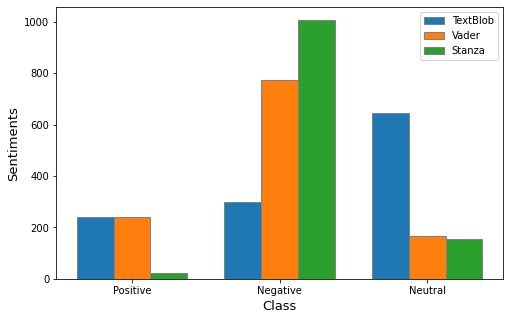

In [51]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
TextBlob = [239, 299, 644]
Vader = [241, 773, 168]
Stanza = [21, 1007, 154]

# Set position of bar on X axis
br1 = np.arange(len(TextBlob))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, TextBlob, width = barWidth,
		edgecolor ='grey', label ='TextBlob')
plt.bar(br2, Vader, width = barWidth,
		edgecolor ='grey', label ='Vader')
plt.bar(br3, Stanza, width = barWidth,
		edgecolor ='grey', label ='Stanza')

# Adding Xticks
plt.xlabel('Class', fontsize = 13)
plt.ylabel('Sentiments', fontsize = 13)
plt.xticks([r + barWidth for r in range(len(TextBlob))],
		['Positive', 'Negative', 'Neutral'])

plt.legend()
plt.show()
